In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import depth_first_tree
import scipy

In [2]:
df = pd.io.parsers.read_csv(
    filepath_or_buffer='points.csv',
    header=None,
    sep=',',
    )
df

,0,1
0,0,0.577
1,0,1.732
2,1,0.000
3,1,2.309
4,2,0.577
5,2,1.732
6,3,0.000
7,3,2.309
8,4,0.577
9,4,1.732


In [3]:
df[1]

0      0.577
1      1.732
2      0.000
3      2.309
4      0.577
5      1.732
6      0.000
7      2.309
8      0.577
9      1.732
10     6.000
11    10.000
12     0.577
13     1.732
14     0.000
15     2.309
16     0.577
17     1.732
18    10.577
19    11.732
20    10.000
21    12.309
22    10.577
23    11.732
24    10.100
25    10.200
Name: 1, dtype: float64

In [4]:
x=np.array(df)
x

array([[ 0.   ,  0.577],
       [ 0.   ,  1.732],
       [ 1.   ,  0.   ],
       [ 1.   ,  2.309],
       [ 2.   ,  0.577],
       [ 2.   ,  1.732],
       [ 3.   ,  0.   ],
       [ 3.   ,  2.309],
       [ 4.   ,  0.577],
       [ 4.   ,  1.732],
       [ 6.   ,  6.   ],
       [10.   , 10.   ],
       [10.   ,  0.577],
       [10.   ,  1.732],
       [11.   ,  0.   ],
       [11.   ,  2.309],
       [12.   ,  0.577],
       [12.   ,  1.732],
       [ 0.   , 10.577],
       [ 0.   , 11.732],
       [ 1.   , 10.   ],
       [ 1.   , 12.309],
       [ 2.   , 10.577],
       [ 2.   , 11.732],
       [10.   , 10.1  ],
       [10.   , 10.2  ]])

In [5]:
x

array([[ 0.   ,  0.577],
       [ 0.   ,  1.732],
       [ 1.   ,  0.   ],
       [ 1.   ,  2.309],
       [ 2.   ,  0.577],
       [ 2.   ,  1.732],
       [ 3.   ,  0.   ],
       [ 3.   ,  2.309],
       [ 4.   ,  0.577],
       [ 4.   ,  1.732],
       [ 6.   ,  6.   ],
       [10.   , 10.   ],
       [10.   ,  0.577],
       [10.   ,  1.732],
       [11.   ,  0.   ],
       [11.   ,  2.309],
       [12.   ,  0.577],
       [12.   ,  1.732],
       [ 0.   , 10.577],
       [ 0.   , 11.732],
       [ 1.   , 10.   ],
       [ 1.   , 12.309],
       [ 2.   , 10.577],
       [ 2.   , 11.732],
       [10.   , 10.1  ],
       [10.   , 10.2  ]])

In [6]:
n=df.shape[0]
d=np.zeros(n)

for c in range(n):
    d[c]=np.sqrt(x[c,0]*x[c,0]+x[c,1]*x[c,1]) 

In [7]:
d

array([ 0.577     ,  1.732     ,  1.        ,  2.51624343,  2.08156888,
        2.64571805,  3.        ,  3.78569426,  4.04140186,  4.35887875,
        8.48528137, 14.14213562, 10.01663262, 10.14888289, 11.        ,
       11.2397278 , 12.01386403, 12.12434839, 10.577     , 11.732     ,
       10.04987562, 12.34955388, 10.76442887, 11.90125304, 14.2130222 ,
       14.28425707])

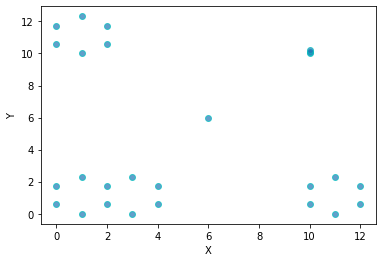

In [8]:
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(
    x[:,0],
    x[:,1],
    cmap='rainbow',
    alpha=0.7,
    edgecolors='c'
)

In [9]:
main = np.hstack((d.reshape(n,1), x.reshape(n,2)    )).real
main


array([[ 0.577     ,  0.        ,  0.577     ],
       [ 1.732     ,  0.        ,  1.732     ],
       [ 1.        ,  1.        ,  0.        ],
       [ 2.51624343,  1.        ,  2.309     ],
       [ 2.08156888,  2.        ,  0.577     ],
       [ 2.64571805,  2.        ,  1.732     ],
       [ 3.        ,  3.        ,  0.        ],
       [ 3.78569426,  3.        ,  2.309     ],
       [ 4.04140186,  4.        ,  0.577     ],
       [ 4.35887875,  4.        ,  1.732     ],
       [ 8.48528137,  6.        ,  6.        ],
       [14.14213562, 10.        , 10.        ],
       [10.01663262, 10.        ,  0.577     ],
       [10.14888289, 10.        ,  1.732     ],
       [11.        , 11.        ,  0.        ],
       [11.2397278 , 11.        ,  2.309     ],
       [12.01386403, 12.        ,  0.577     ],
       [12.12434839, 12.        ,  1.732     ],
       [10.577     ,  0.        , 10.577     ],
       [11.732     ,  0.        , 11.732     ],
       [10.04987562,  1.        , 10.   

In [10]:
mainSort=main[np.lexsort(([main[:, i] for i in range(main.shape[1]-1, -1, -1)]))]
mainSort

array([[ 0.577     ,  0.        ,  0.577     ],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.732     ,  0.        ,  1.732     ],
       [ 2.08156888,  2.        ,  0.577     ],
       [ 2.51624343,  1.        ,  2.309     ],
       [ 2.64571805,  2.        ,  1.732     ],
       [ 3.        ,  3.        ,  0.        ],
       [ 3.78569426,  3.        ,  2.309     ],
       [ 4.04140186,  4.        ,  0.577     ],
       [ 4.35887875,  4.        ,  1.732     ],
       [ 8.48528137,  6.        ,  6.        ],
       [10.01663262, 10.        ,  0.577     ],
       [10.04987562,  1.        , 10.        ],
       [10.14888289, 10.        ,  1.732     ],
       [10.577     ,  0.        , 10.577     ],
       [10.76442887,  2.        , 10.577     ],
       [11.        , 11.        ,  0.        ],
       [11.2397278 , 11.        ,  2.309     ],
       [11.732     ,  0.        , 11.732     ],
       [11.90125304,  2.        , 11.732     ],
       [12.01386403, 12.        ,  0.577

In [11]:
bond_distance = 2/ np.sqrt(3) + 0.001
bond_distance

1.1557005383792516

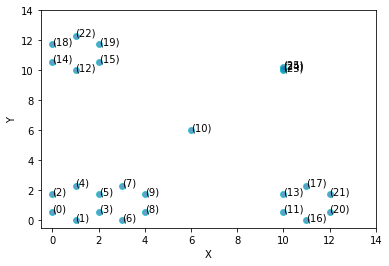

In [12]:

filtered = list(filter(lambda x: (x[0] <=5) , mainSort))
filtered = mainSort
np_filtered = np.asarray(filtered)
marker = np.arange(len(filtered))
np_filtered
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(
    np_filtered[:,1],
    np_filtered[:,2],
    cmap='rainbow',
    alpha=0.7,
    edgecolors='c',
)
plt.xlim(-0.5,  14)
plt.ylim(-0.5, 14)
for x in marker:
    plt.text(np_filtered[x][1], np_filtered[x][2], '({})'.format(x))

In [13]:
print(np_filtered)

[[ 0.577       0.          0.577     ]
 [ 1.          1.          0.        ]
 [ 1.732       0.          1.732     ]
 [ 2.08156888  2.          0.577     ]
 [ 2.51624343  1.          2.309     ]
 [ 2.64571805  2.          1.732     ]
 [ 3.          3.          0.        ]
 [ 3.78569426  3.          2.309     ]
 [ 4.04140186  4.          0.577     ]
 [ 4.35887875  4.          1.732     ]
 [ 8.48528137  6.          6.        ]
 [10.01663262 10.          0.577     ]
 [10.04987562  1.         10.        ]
 [10.14888289 10.          1.732     ]
 [10.577       0.         10.577     ]
 [10.76442887  2.         10.577     ]
 [11.         11.          0.        ]
 [11.2397278  11.          2.309     ]
 [11.732       0.         11.732     ]
 [11.90125304  2.         11.732     ]
 [12.01386403 12.          0.577     ]
 [12.12434839 12.          1.732     ]
 [12.34955388  1.         12.309     ]
 [14.14213562 10.         10.        ]
 [14.2130222  10.         10.1       ]
 [14.28425707 10.        

In [14]:
graph = distance_matrix(np_filtered[:, 1:], np_filtered[:, 1:]) <= bond_distance
np.fill_diagonal(graph, False)
df = pd.DataFrame(np.asarray(graph,dtype=np.uint8))
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X = csr_matrix(graph)
Tcsr = depth_first_tree(X, 0, directed=False)
dfs_tree = Tcsr.toarray().astype(int)

rows, cols = np.where(dfs_tree == 1)
edges = zip(rows.tolist(), cols.tolist())
node_map = {}
for x, y in edges:
    if x not in node_map:
        node_map[x] = []
    node_map[x].append(y)
    
print(node_map)

tree = []
x = list(node_map.keys())[0]
print(node_map[x][0])
i = 0
while(True and i < 7):
    if x not in rows:
        break
    tree.append((x, node_map[x][0]))
    x = node_map[x][0]
    i += 1
print(tree)
np.nonzero(dfs_tree)[0]

{0: [1], 1: [3], 3: [5], 4: [2], 5: [4, 7], 7: [9], 8: [6], 9: [8]}
1
[(0, 1), (1, 3), (3, 5), (5, 4), (4, 2)]


array([0, 1, 3, 4, 5, 5, 7, 8, 9])

In [81]:
# dfs_tree
a=np.array(rows)
b=np.array(cols)
n=a.shape[0]
c=np.hstack((a.reshape(n,1), b.reshape(n,1))).real
c


array([[0, 1],
       [1, 3],
       [3, 5],
       [4, 2],
       [5, 4],
       [5, 7],
       [7, 9],
       [8, 6],
       [9, 8]])

In [76]:
from collections import defaultdict

edges = zip(rows.tolist(), cols.tolist())
edges = [(1,3), (4,6), (3,6), (1,4)]
adj = defaultdict(set)
for x, y in edges:
    adj[x].add(y)
    adj[y].add(x)

col = defaultdict(int)
def dfs(x, parent=None):
    if col[x] == 1: return True
    if col[x] == 2: return False
    col[x] = 1
    res = False
    for y in adj[x]:
        if y == parent: continue
        if dfs(y, x): res = True
    col[x] = 2
    return res

for x in adj:
    if dfs(x):
        print ("There's a cycle reachable from %d!" %x)

In [18]:
start_node = 0
trees = []
i = 0
flags = np.ones((graph.shape[0]))
count = 0

while(True):
    Tcsr = depth_first_tree(X, start_node, directed=False)
    dfs_tree = Tcsr.toarray().astype(int)
    print(np.nonzero(dfs_tree))
    tree = np.nonzero(dfs_tree)[1]
    trees.append(tree)
    flags[tree] = 0
    flags[start_node] = 0
    count += (tree.shape[0])
    
    if np.sum(flags) == 0:
        break
    start_node = np.nonzero(flags)[0][0]
        
print(trees)
print(count)

(array([0, 1, 3, 4, 5, 5, 7, 8, 9]), array([1, 3, 5, 2, 4, 7, 9, 6, 8]))
(array([], dtype=int64), array([], dtype=int64))
(array([11, 13, 17, 20, 21]), array([13, 17, 21, 16, 20]))
(array([12, 14, 18, 19, 22]), array([14, 18, 22, 15, 19]))
(array([23, 24]), array([24, 25]))
[array([1, 3, 5, 2, 4, 7, 9, 6, 8]), array([], dtype=int64), array([13, 17, 21, 16, 20]), array([14, 18, 22, 15, 19]), array([24, 25])]
21
